In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
filter_colours = {'u': '#6A5ACD', 'g': '#2ca02c', 'r': '#d62728', 'i': '#ff7f0e', 'z': '#8c564b', 'y': '#1b1b1b'}

In [21]:
#Insert path to lightcurve file
path = '/MALLORN/data/raw/split_03/train_full_lightcurves.csv'

#Reading all lightcurve data into a dataframe
df = pd.read_csv(path)

In [22]:
#Define name of chosen object
object_ID = 'amon_imloth_luin'

#Creating masks to isolate data for chosen lightcurve and split according to filter
u_mask = ((df['Filter'] == 'u') & (df['object_id'] == object_ID))
g_mask = ((df['Filter'] == 'g') & (df['object_id'] == object_ID))
r_mask = ((df['Filter'] == 'r') & (df['object_id'] == object_ID))
i_mask = ((df['Filter'] == 'i') & (df['object_id'] == object_ID))
z_mask = ((df['Filter'] == 'z') & (df['object_id'] == object_ID))
y_mask = ((df['Filter'] == 'y') & (df['object_id'] == object_ID))

#Saving fluxes, times and error values for the object split according to filter
u_flux = np.array(df.loc[u_mask, 'Flux']); u_time = np.array(df.loc[u_mask, 'Time (MJD)']); u_err = np.array(df.loc[u_mask, 'Flux_err'])
g_flux = np.array(df.loc[g_mask, 'Flux']); g_time = np.array(df.loc[g_mask, 'Time (MJD)']); g_err = np.array(df.loc[g_mask, 'Flux_err'])
r_flux = np.array(df.loc[r_mask, 'Flux']); r_time = np.array(df.loc[r_mask, 'Time (MJD)']); r_err = np.array(df.loc[r_mask, 'Flux_err'])
i_flux = np.array(df.loc[i_mask, 'Flux']); i_time = np.array(df.loc[i_mask, 'Time (MJD)']); i_err = np.array(df.loc[i_mask, 'Flux_err'])
z_flux = np.array(df.loc[z_mask, 'Flux']); z_time = np.array(df.loc[z_mask, 'Time (MJD)']); z_err = np.array(df.loc[z_mask, 'Flux_err'])
y_flux = np.array(df.loc[y_mask, 'Flux']); y_time = np.array(df.loc[y_mask, 'Time (MJD)']); y_err = np.array(df.loc[y_mask, 'Flux_err'])

In [23]:
#Loading in log data file
log_path = '/MALLORN/data/raw/train_log.csv'
log_df = pd.read_csv(log_path)

#Selecting only the data relevant to the chosen object
object_log = log_df.loc[log_df['object_id'] == object_ID]
print(object_log)

#Defining the redshift of that object
redshift = object_log['Z']

#redshift_err = object_log['Z_err']
#For training set, it is a spectroscopically determined redshift (with negligible error).
#For testing set, it will be a photometrically determined redahift and will have an error value that can be loaded in using the above line.

ebv = object_log['EBV']
#Loading in the extinction coefficient value
#Dust in the Milky Way can obscure the light from a distant object. The amount of extinction is dependent on the position of the object relative to us and the wavelength of light.
#The extinction coefficient (EBV) value is given in the log data to simplify the de-extinction process.

SpecType = object_log['SpecType']
#For the training set, the type of the object will be listed in the 'SpecType' column
#For the testing set, this value will not be present

           object_id       Z  Z_err    EBV SpecType  \
12  amon_imloth_luin  0.7766    NaN  0.055      TDE   

                                  English Translation     split  target  
12  hill, steep-sided mount  +  flowering valley  ...  split_01       1  


In [24]:
#Importing necessary package
from extinction import fitzpatrick99

#Defining function to de-extinct a set of flux values
def jurassic_park (flux, eff_wl):
    A_lambda = fitzpatrick99(eff_wl, ebv * 3.1) #3.1 = Standard Milky Way value
    flux_ext = flux * 10**((A_lambda)/2.5)
    return flux_ext, A_lambda

In [25]:
#Effective wavelength for each band - sourced from SVO Filter Profile Service
u_eff_wl = np.array([3641]); g_eff_wl = np.array([4704]); r_eff_wl = np.array([6155])
i_eff_wl = np.array([7504]); z_eff_wl = np.array([8695]); y_eff_wl = np.array([10056])

#De-extincting lightcurves
u_flux, u_A_lambda = jurassic_park(u_flux,u_eff_wl); g_flux, g_A_lambda = jurassic_park(g_flux,g_eff_wl)
r_flux, r_A_lambda = jurassic_park(r_flux,r_eff_wl); i_flux, i_A_lambda = jurassic_park(i_flux,i_eff_wl)
z_flux, z_A_lumbda = jurassic_park(z_flux,z_eff_wl) ;y_flux, y_A_lambda = jurassic_park(y_flux,y_eff_wl)

print(f'u band extinction = {u_A_lambda}'); print(f'g band extinction = {g_A_lambda}'); print(f'r band extinction = {r_A_lambda}')
print(f'i band extinction = {i_A_lambda}'); print(f'z band extinction = {z_A_lumbda}'); print(f'y band extinction = {y_A_lambda}')

u band extinction = [0.26116086]
g band extinction = [0.20746283]
r band extinction = [0.14256113]
i band extinction = [0.1049135]
z band extinction = [0.08188936]
y band extinction = [0.06363456]


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8648\3944608380.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  A_lambda = fitzpatrick99(eff_wl, ebv * 3.1) #3.1 = Standard Milky Way value


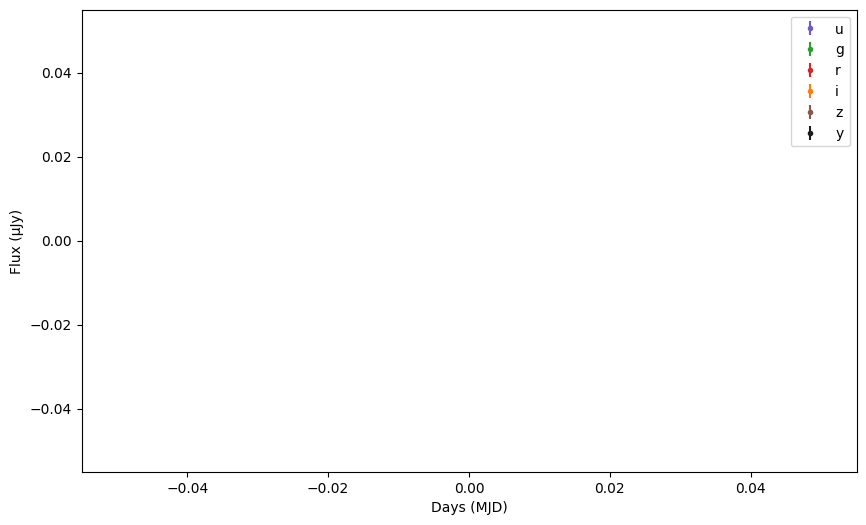

In [26]:
plt.figure(figsize = [10,6])
plt.errorbar(u_time,u_flux, yerr= u_err,label='u', fmt = '.',color = filter_colours['u'],zorder=4)
plt.errorbar(g_time,g_flux,yerr=g_err, label='g', fmt = '.', color = filter_colours['g'],zorder=5)
plt.errorbar(r_time,r_flux,yerr = r_err, label='r', fmt = '.', color = filter_colours['r'],zorder=6)
plt.errorbar(i_time,i_flux,yerr = i_err, label='i', fmt = '.', color = filter_colours['i'],zorder=3)
plt.errorbar(z_time,z_flux,yerr = z_err, label='z', fmt = '.', color = filter_colours['z'],zorder=2)
plt.errorbar(y_time,y_flux,yerr = y_err, label='y', fmt = '.', color = filter_colours['y'],zorder=1)
plt.xlabel('Days (MJD)')
plt.ylabel('Flux (μJy)')
plt.legend()
plt.show()